## Basic Dataset Preprocessing


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bank = pd.read_csv("bank.csv")

In [3]:
## Renaming of the target variable
bank = bank.rename(columns = {"y": "FinalOutcome"})

In [4]:
bank.FinalOutcome.value_counts()

0    36548
1     4640
Name: FinalOutcome, dtype: int64

In [5]:
bank.shape

(41188, 21)

In [6]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,FinalOutcome
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [7]:
bank.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
FinalOutcome        int64
dtype: object

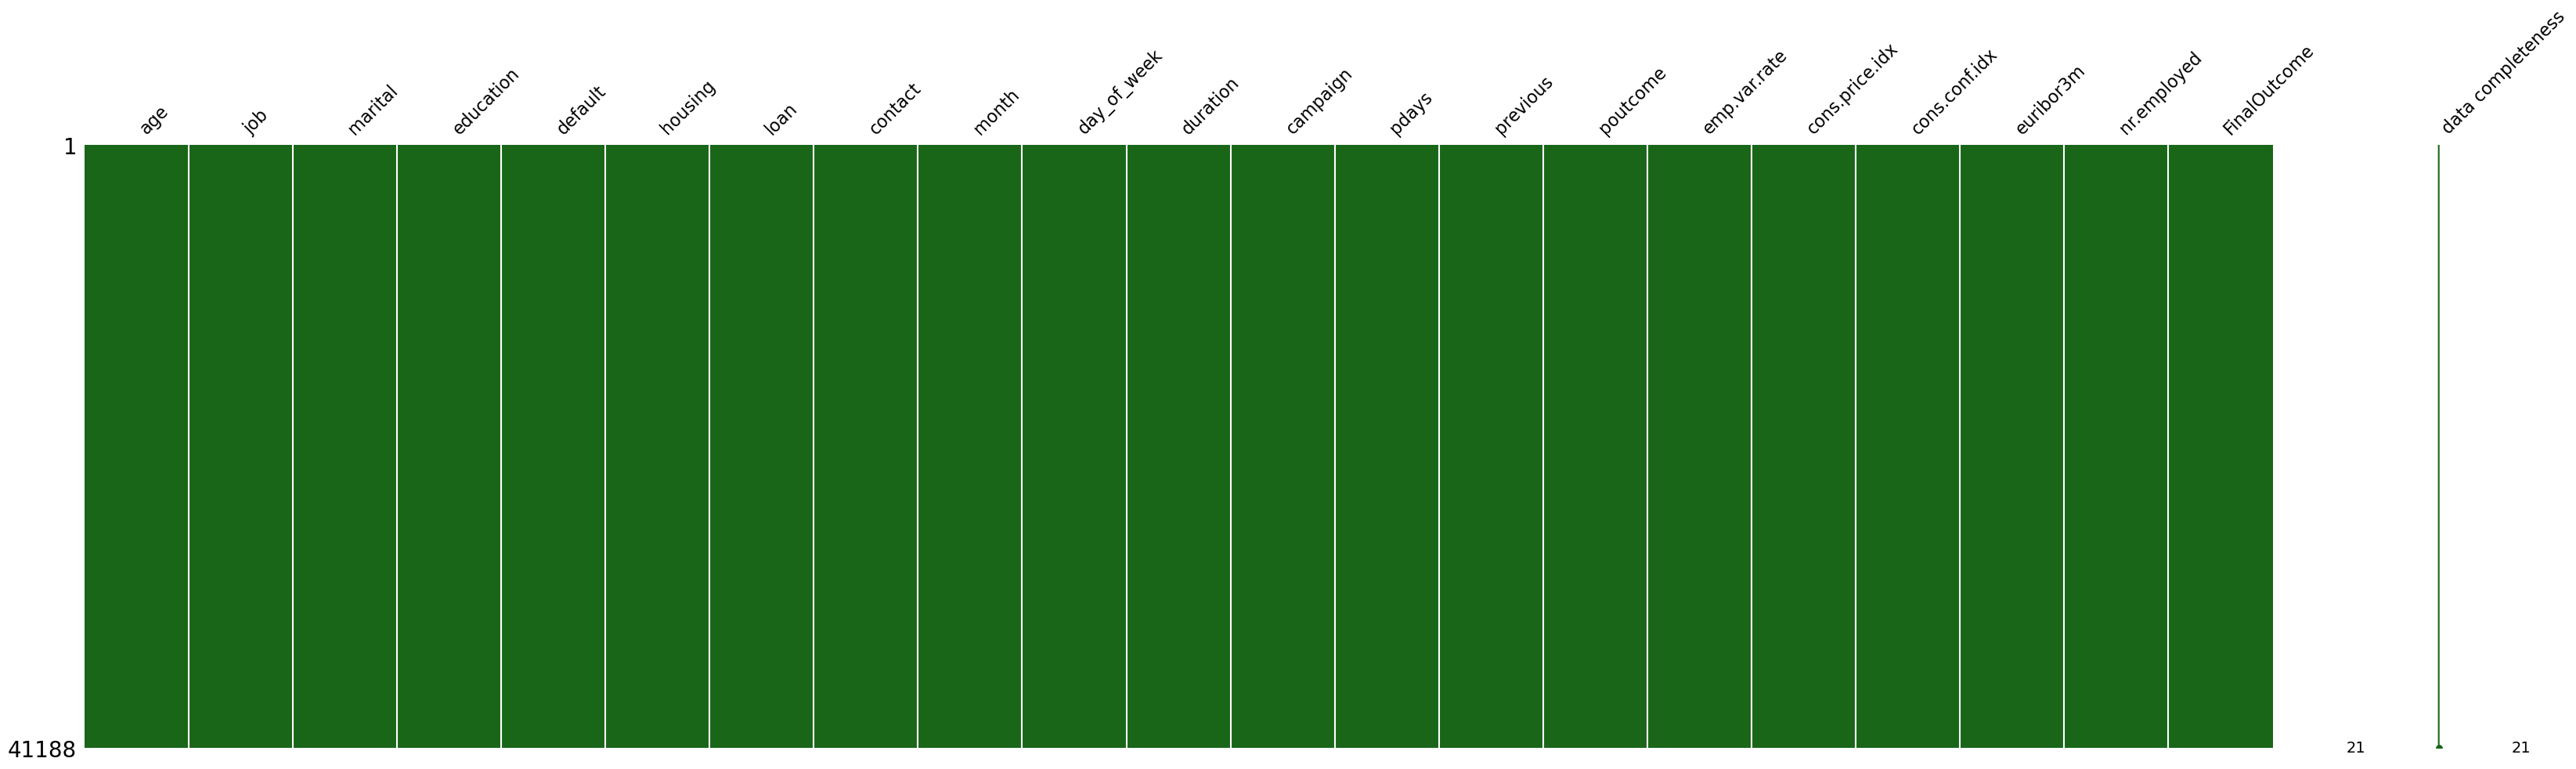

In [8]:
## Check for Missing Data
import missingno as ms
mv_matrix = ms.matrix(bank,
                      figsize=(40, 10), 
                      color = (0.1, 0.4, 0.1), 
                      labels=True) 

In [9]:
bank = bank.replace(' ', np.nan)
bank = bank.replace('', np.nan)
bank = bank.replace('#VALUE!', np.nan)
bank = bank.replace('nan', np.nan)
bank = bank.replace('NaN', np.nan)

<AxesSubplot:xlabel='campaign', ylabel='Count'>

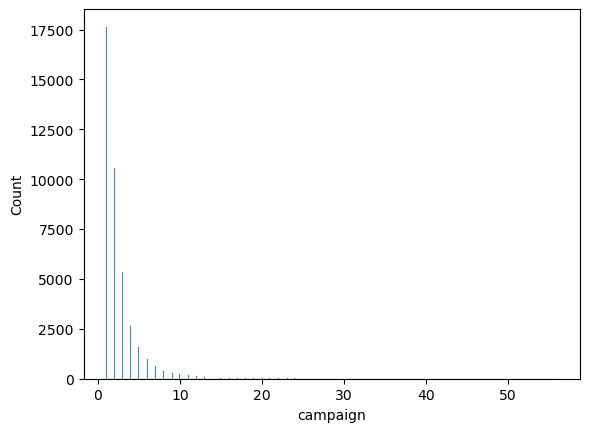

In [10]:
sns.histplot(data=bank, x="campaign")

In [12]:
#Dropping duplicate rows
bank = bank.drop_duplicates()

In [13]:
## Fixing data
bank['pdays'] = bank['pdays'].apply(lambda x: 0 if x==999 else x )
bank.pdays[bank.pdays==-1]=0
bank['duration'] = bank['duration'].apply(lambda x: x/60)

In [ ]:


#sc= StandardScaler()
#scale = sc.fit_transform(bank[["emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m"]]) 
#bank.loc[:,("emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m")] = scale

## EDA

In [ ]:
bank.head()

(array([1.013e+03, 1.950e+02, 4.700e+01, 1.400e+01, 9.000e+00, 4.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00]),
 array([ 15. ,  23.5,  32. ,  40.5,  49. ,  57.5,  66. ,  74.5,  83. ,
         91.5, 100. ]),
 <BarContainer object of 10 artists>)

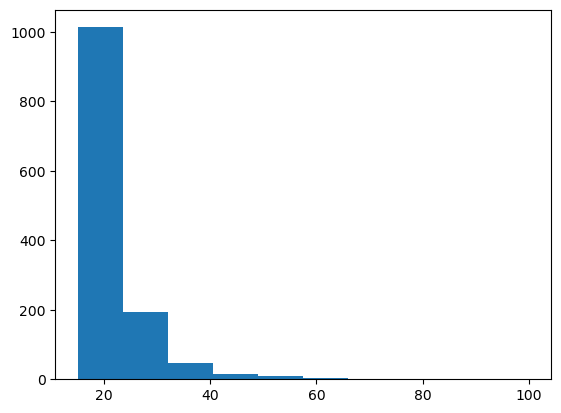

In [14]:
## Distribution of Contact Duration
plt.hist(bank.duration, range = (15,100))

In [25]:
bank = bank.query('campaign <= 4 & duration <= 600')

(array([6.0500e+02, 8.7230e+03, 1.4433e+04, 8.5230e+03, 6.6610e+03,
        1.6130e+03, 3.4900e+02, 1.8700e+02, 7.4000e+01, 8.0000e+00]),
 array([ 15. ,  23.5,  32. ,  40.5,  49. ,  57.5,  66. ,  74.5,  83. ,
         91.5, 100. ]),
 [<matplotlib.patches.Polygon at 0x7fb44bf63b80>])

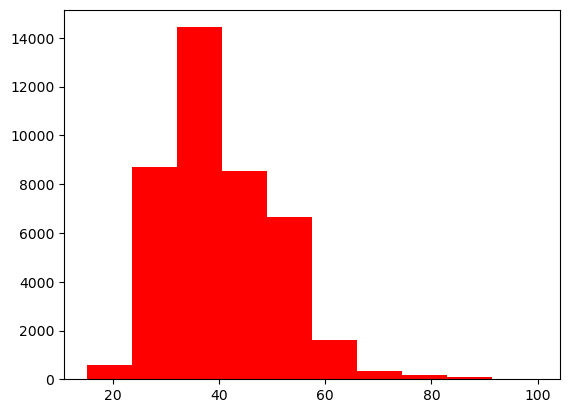

In [17]:
## Distribution of Age
plt.hist(bank.age, color = 'red', label = 'Age',range = (15,100), histtype = 'stepfilled')

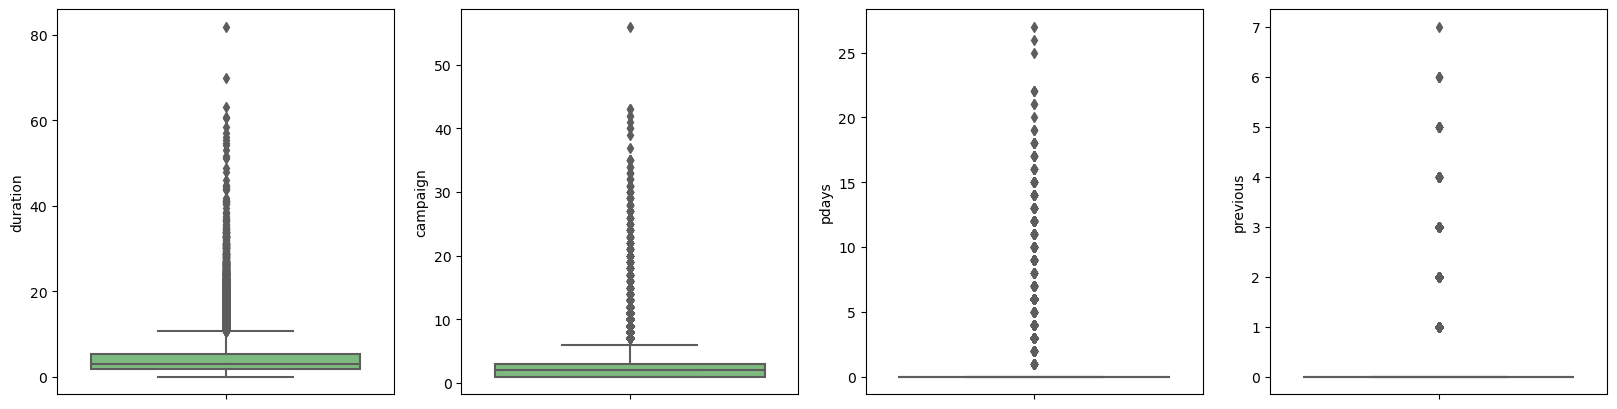

In [18]:
numeric = bank[['duration', 'campaign', 'pdays', 'previous']]
fig, axes = plt.subplots(nrows=1, ncols=len(numeric.columns), figsize=(20,5))

for i, column in enumerate(numeric.columns):
    sns.boxplot(data=bank,y=column,orient="v",ax=axes[i],palette="Greens")

/Users/nikosgalanos/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/nikosgalanos/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/nikosgalanos/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpr

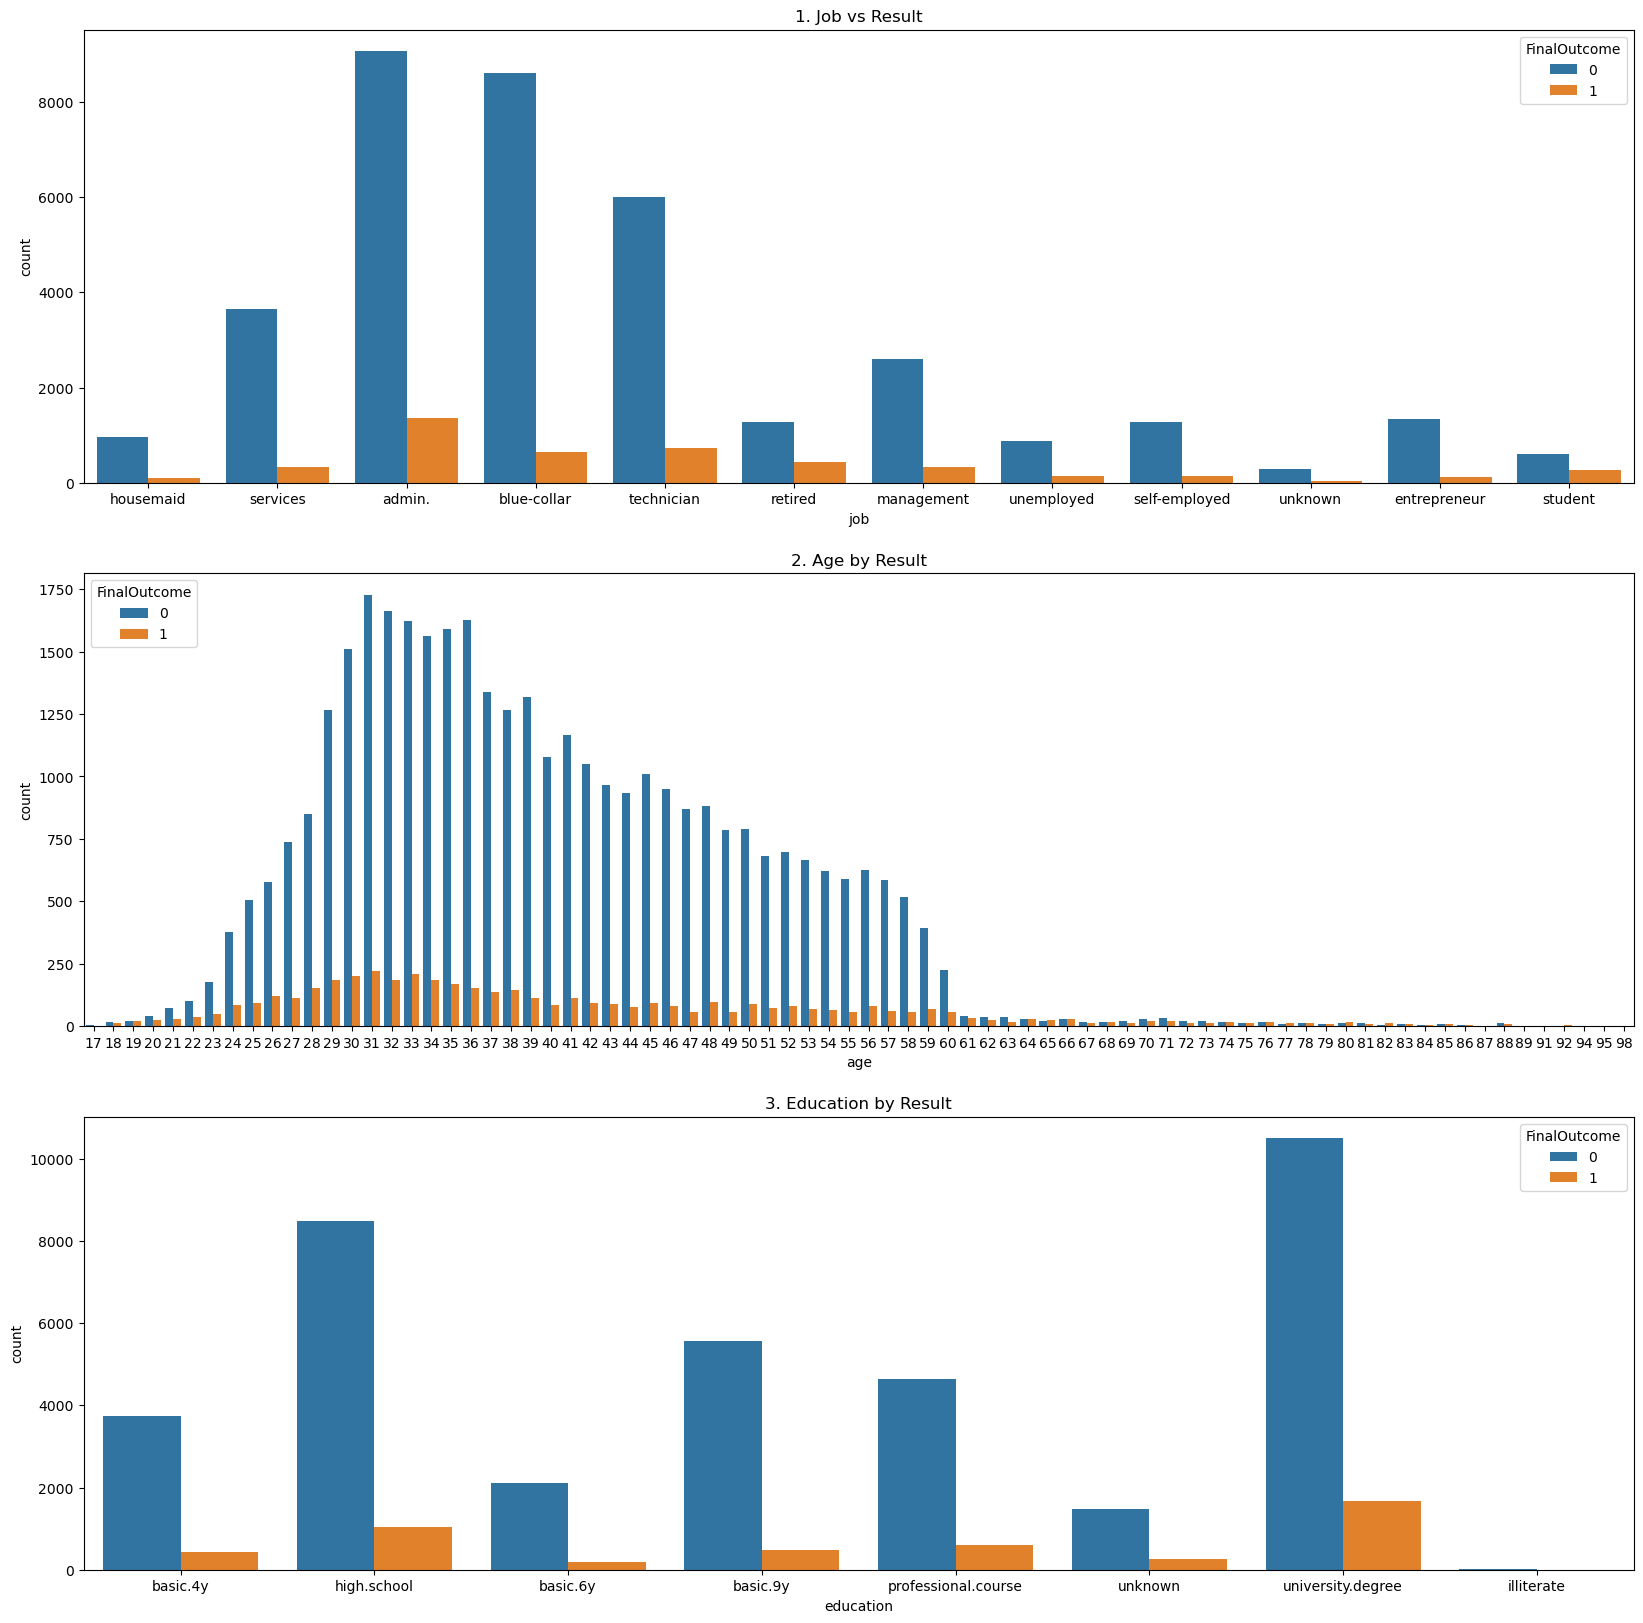

In [19]:
plt.figure(figsize=(20,20))

plt.subplot(3,1,1)
sns.countplot(bank['job'],hue=bank['FinalOutcome'])
plt.title('1. Job vs Result')

plt.subplot(3,1,2)
sns.countplot(bank['age'],hue=bank['FinalOutcome'])
plt.title('2. Age by Result')

plt.subplot(3,1,3)
sns.countplot(bank['education'],hue=bank['FinalOutcome'])
plt.title('3. Education by Result')

plt.show()

/Users/nikosgalanos/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/nikosgalanos/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/nikosgalanos/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpr

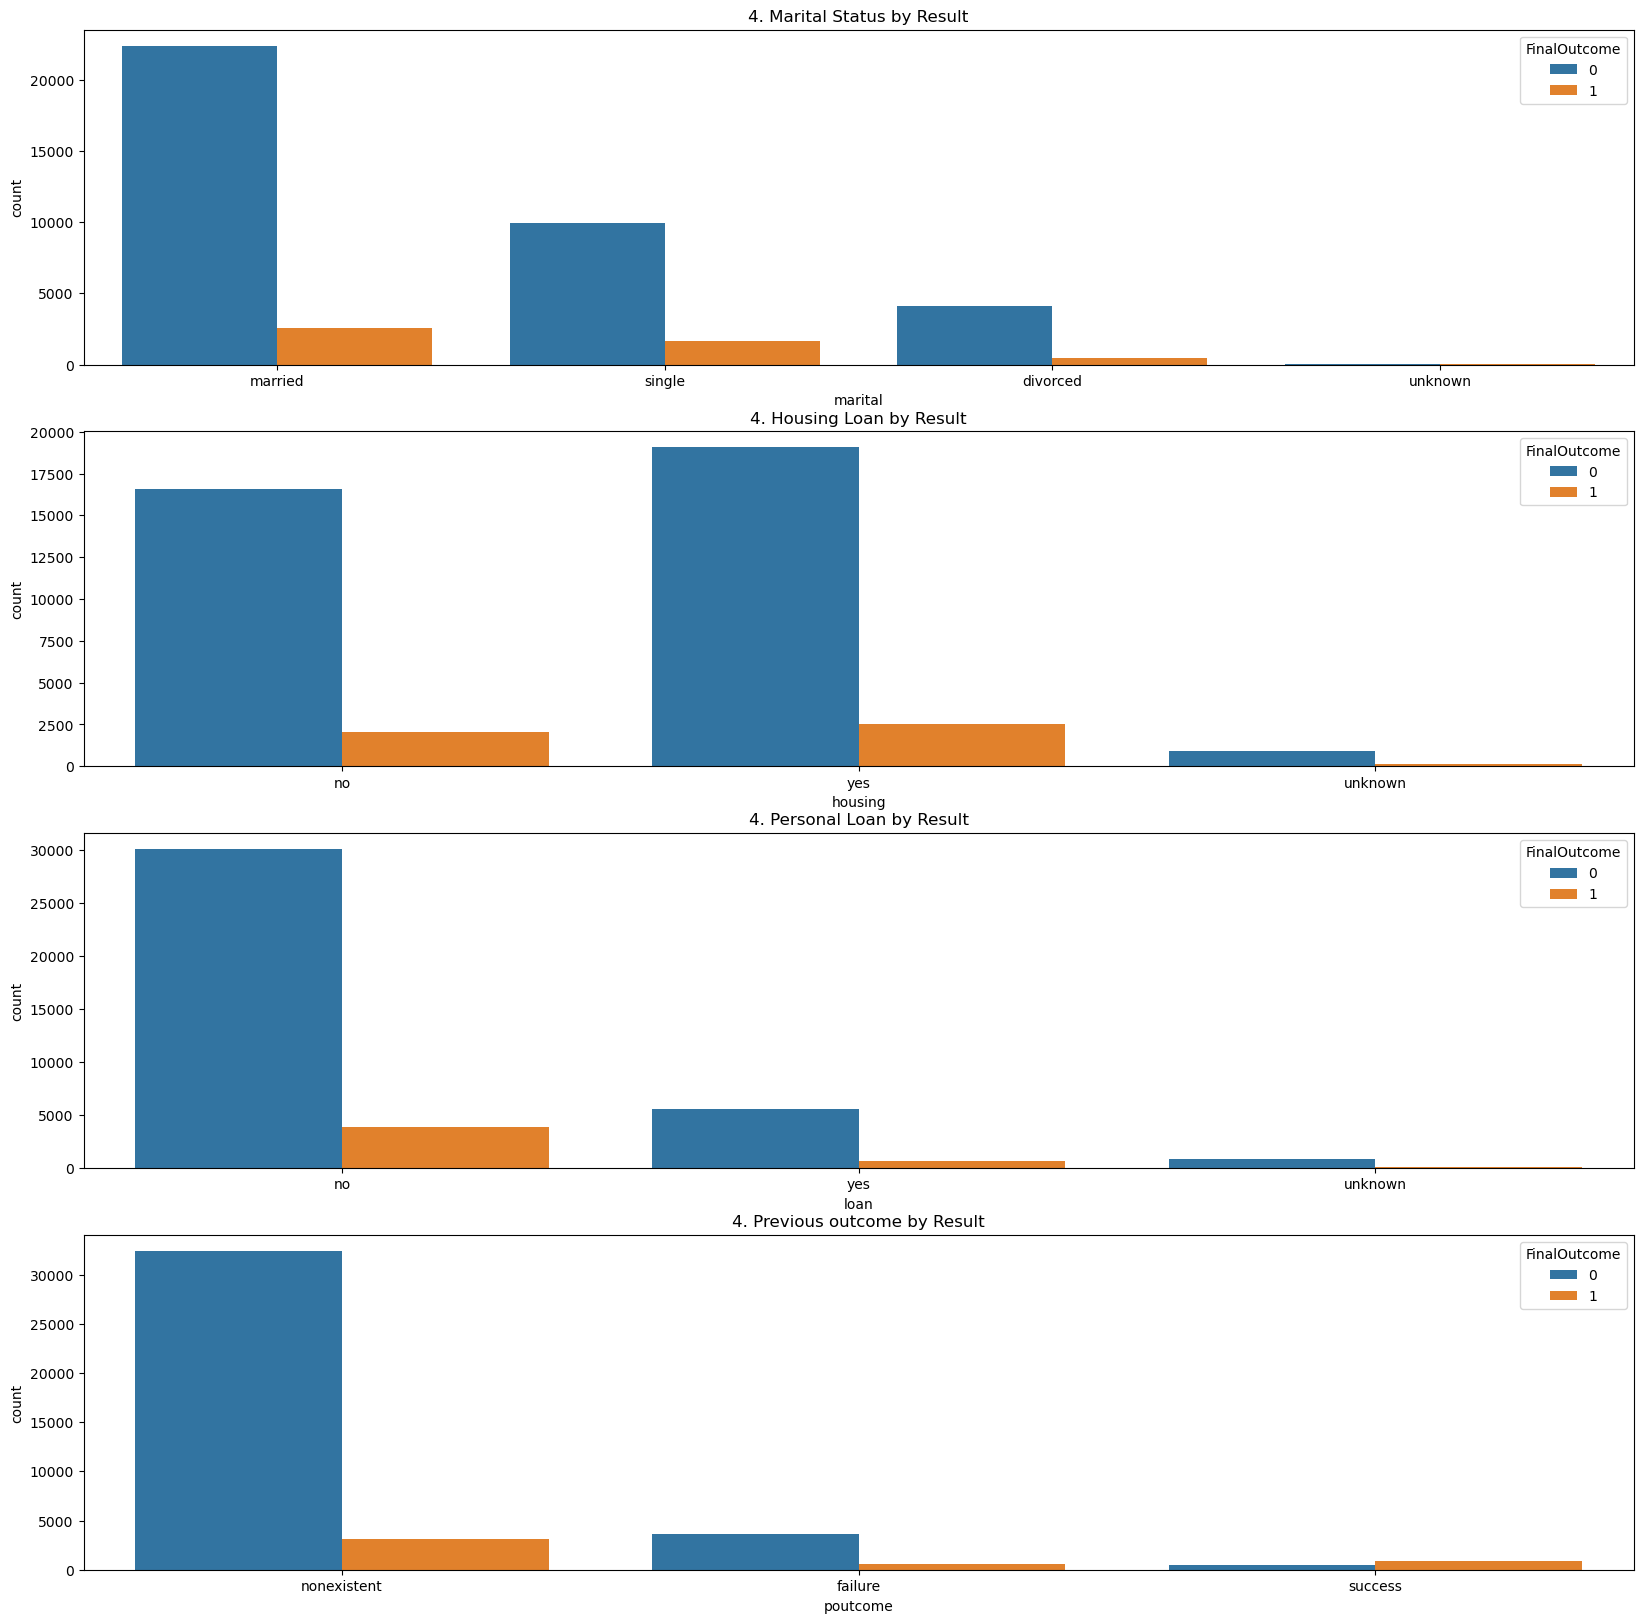

In [20]:
plt.figure(figsize=(20,20))
plt.subplot(4,1,1)
sns.countplot(bank['marital'],hue=bank['FinalOutcome'])
plt.title('4. Marital Status by Result')

plt.subplot(4,1,2)
sns.countplot(bank['housing'],hue=bank['FinalOutcome'])
plt.title('4. Housing Loan by Result')

plt.subplot(4,1,3)
sns.countplot(bank['loan'],hue=bank['FinalOutcome'])
plt.title('4. Personal Loan by Result')

plt.subplot(4,1,4)
sns.countplot(bank['poutcome'],hue=bank['FinalOutcome'])
plt.title('4. Previous outcome by Result')
plt.show()

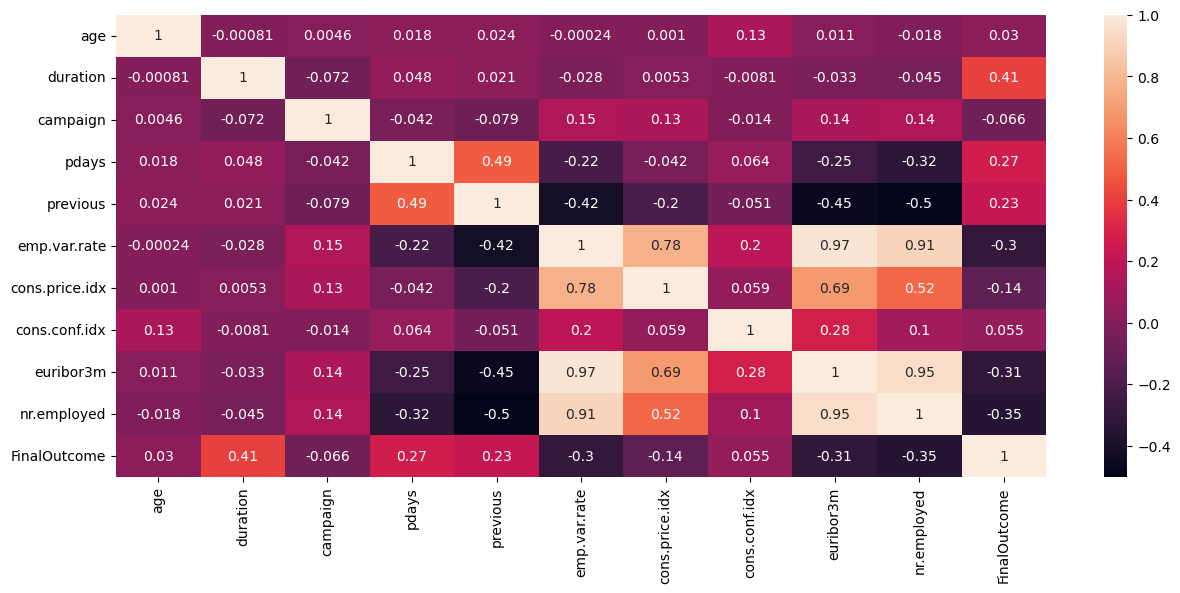

In [21]:
plt.figure(figsize=(15,6))
sns.heatmap(bank.corr(),annot=True)
plt.show()

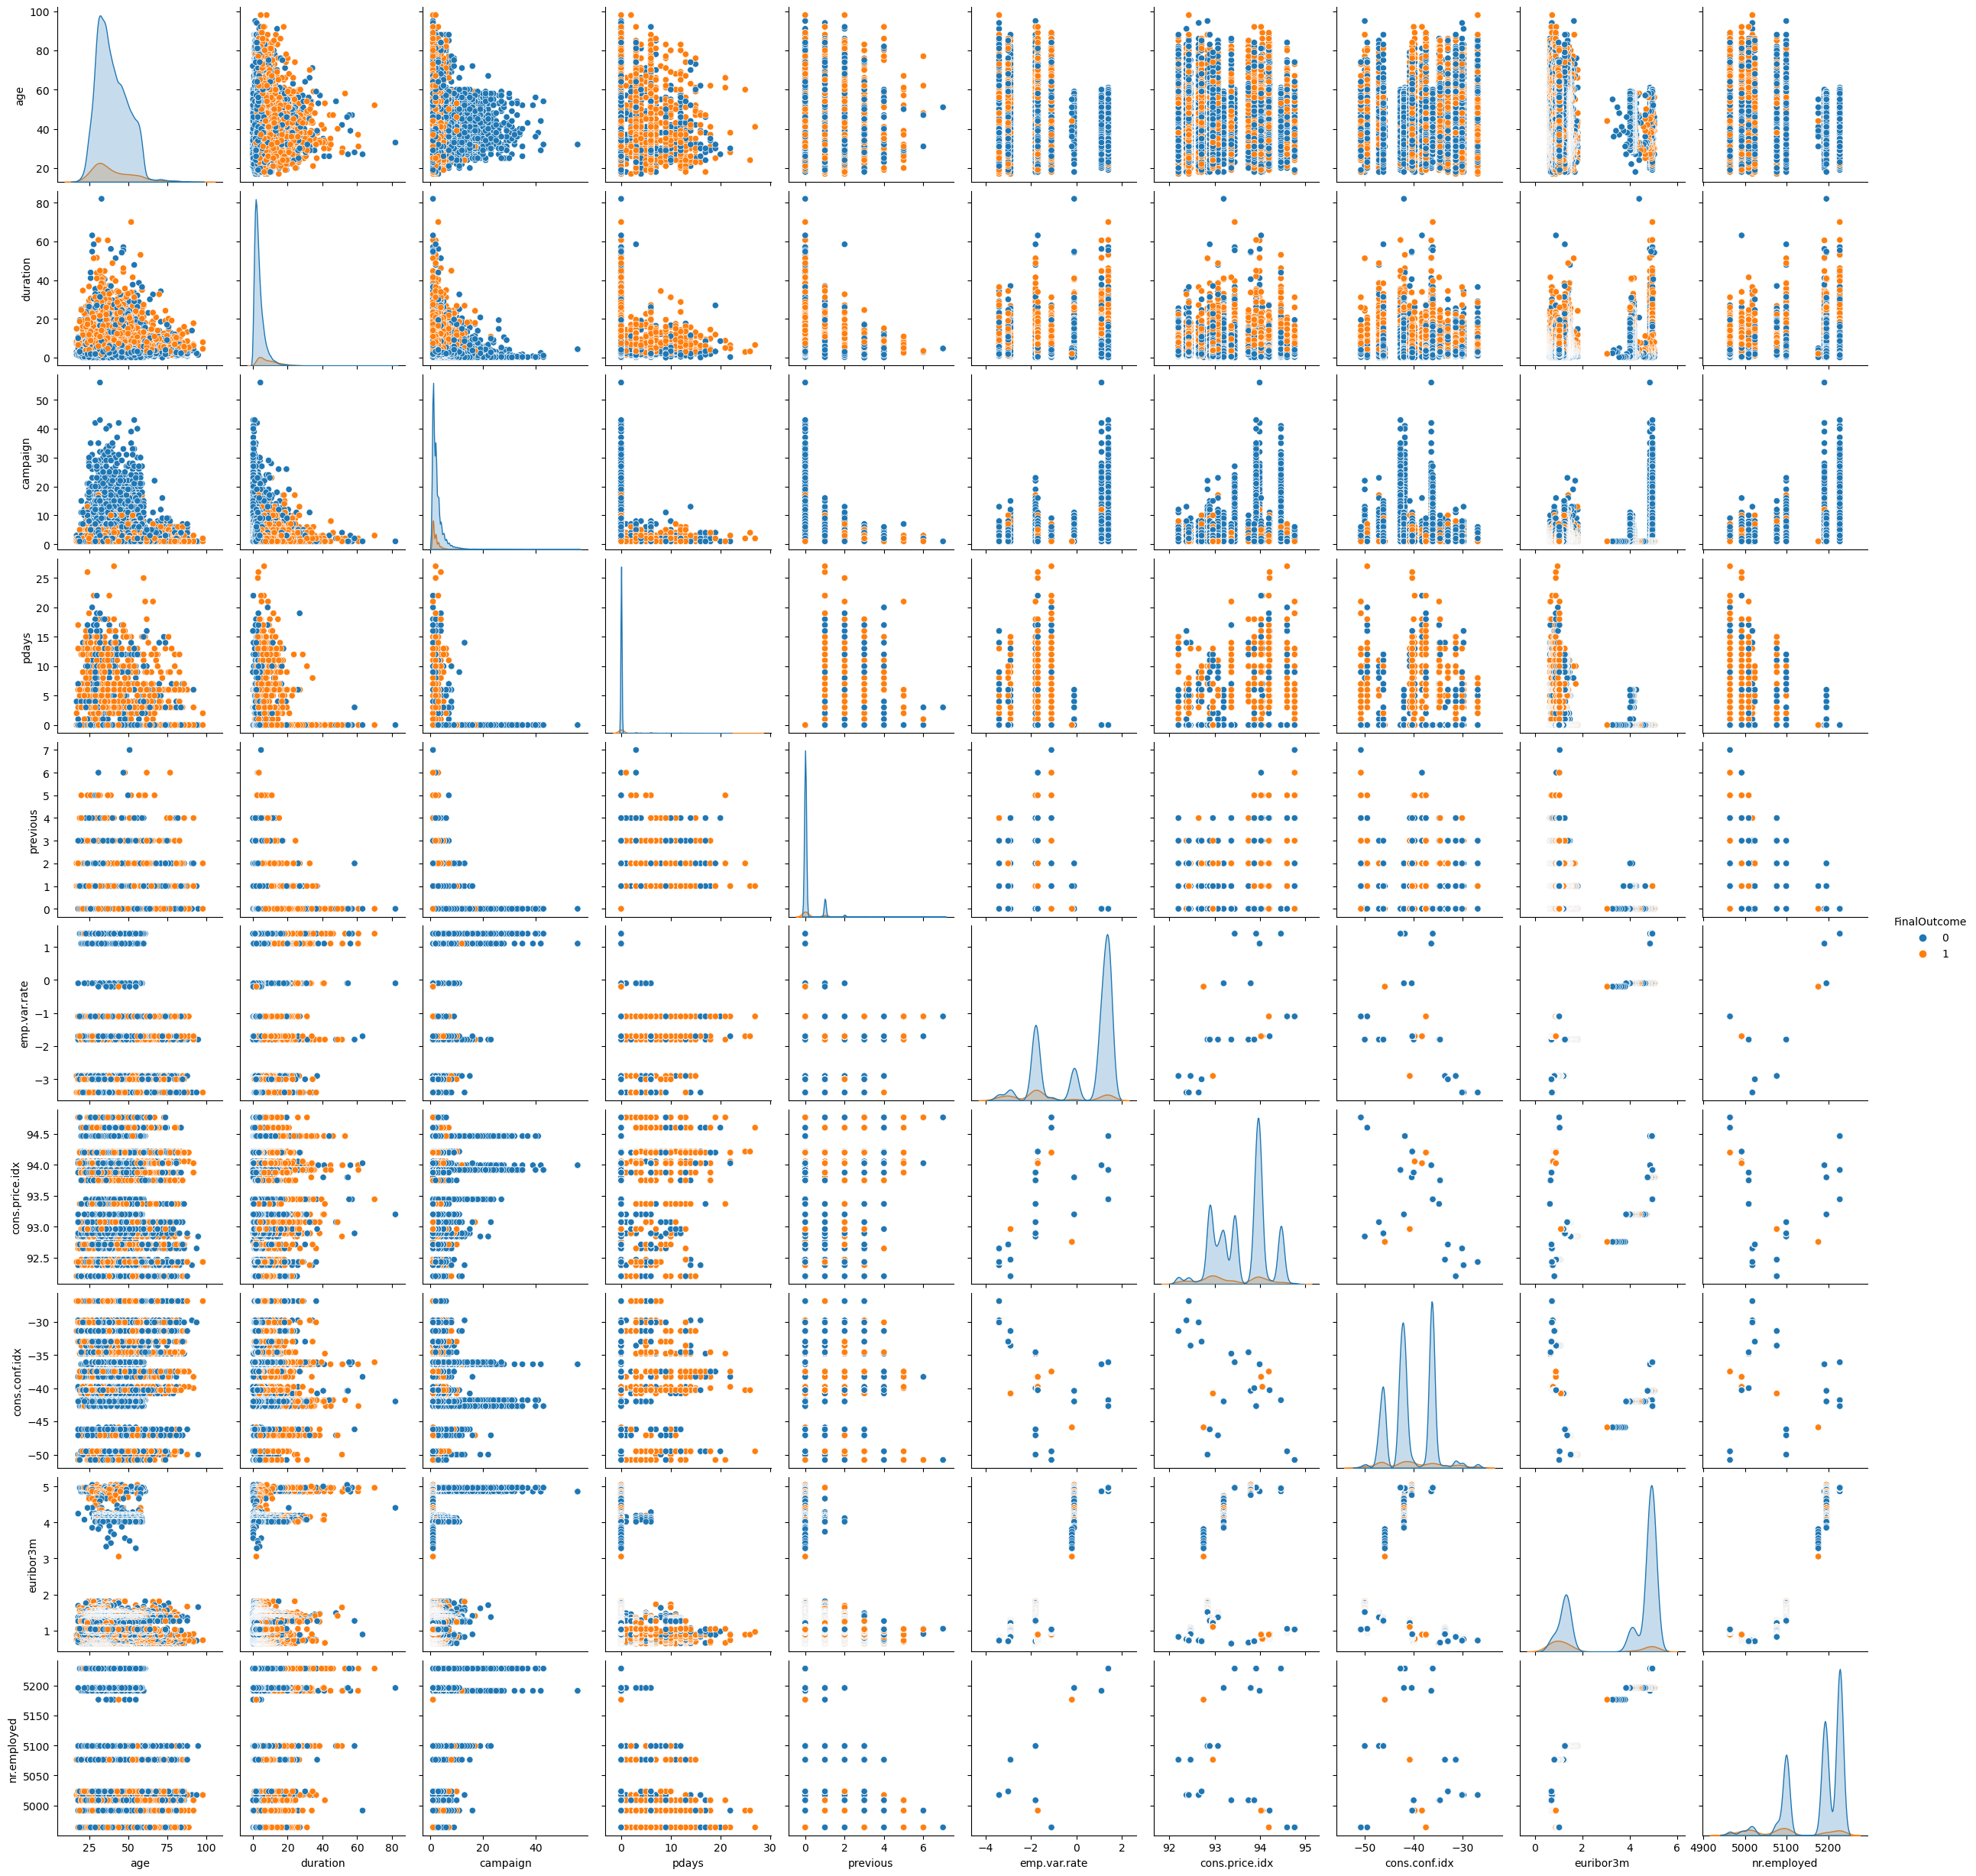

In [22]:
sns.pairplot(data=bank,hue='FinalOutcome')
plt.show()

<AxesSubplot:>

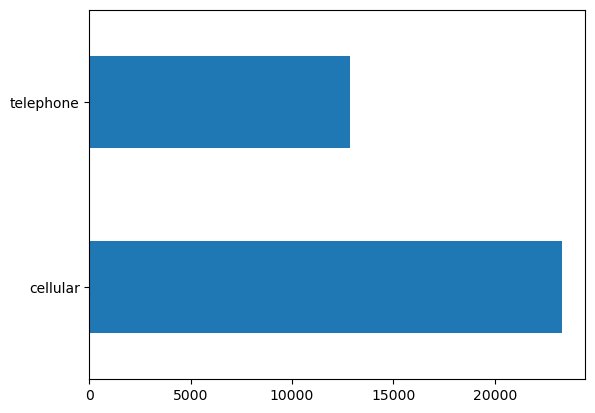

In [26]:
bank.contact.value_counts().plot(kind = 'barh')

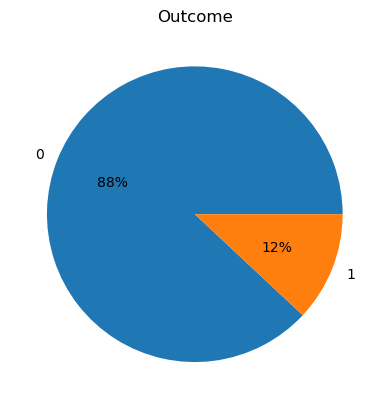

In [27]:
target_var=pd.crosstab(index=bank['FinalOutcome'],columns='% observations')
plt.pie(target_var['% observations'],labels=target_var['% observations'].index,autopct='%.0f%%')
plt.title('Outcome')
plt.show()

In [29]:
bank = pd.get_dummies(bank, columns = ['contact','job', 'marital', 'education', 'default', 'housing', 'loan', 'day_of_week', 'month', 'day_of_week', 'poutcome'], drop_first = True)

In [30]:
bank.to_csv('bank_processed.csv')